In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve, KFold
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
np.random.seed(0)

In [2]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X, y = iris_data.data, iris_data.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
kf = KFold(n_splits=25)
list_training_error = []
list_testing_error = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    # print(train)
    # print(test)
    # print(X_train)
    # print(y_train)
    model = MLPRegressor() #its a multilayer perceptron regressor model.
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train,y_train_pred)
    fold_testing_error = mean_absolute_error(y_test,y_test_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

    

In [13]:
list_testing_error

[0.15949667127671255,
 0.0429029013279091,
 0.10481152992065557,
 0.832464849980458,
 0.5528304710252937,
 0.4107978150709914,
 0.0766309985396555,
 1.083068677037426,
 0.8161387781339094,
 0.45794684821533876,
 0.4792196088120731,
 0.2593479805481358,
 0.4607301797200846,
 0.44077628157986415,
 0.29245292317682475,
 0.22235924593435585,
 0.18502829500861676,
 0.12193029379729121,
 0.222374491503347,
 0.2665033403668601,
 0.2119950810394391,
 0.24741803139819937,
 0.26329956168149504,
 0.24278915004016413,
 0.31952076377868416]

In [14]:
list_training_error

[0.1960159347376943,
 0.22981471257567232,
 0.18791914046213107,
 0.4814824677035513,
 0.4258104494545031,
 0.3122911055979315,
 0.1720876984207654,
 0.5924755205443873,
 0.5850646996023396,
 0.5010981319928095,
 0.5827784604742887,
 0.17017630204294573,
 0.20531333511866728,
 0.6353633341943302,
 0.18150609770916623,
 0.1848642687887631,
 0.16775793411504913,
 0.1763191747434731,
 0.16575273625848222,
 0.1745230094416944,
 0.4806276746504672,
 0.173268457613158,
 0.1890882558288026,
 0.1774080446046803,
 0.19790806360549404]

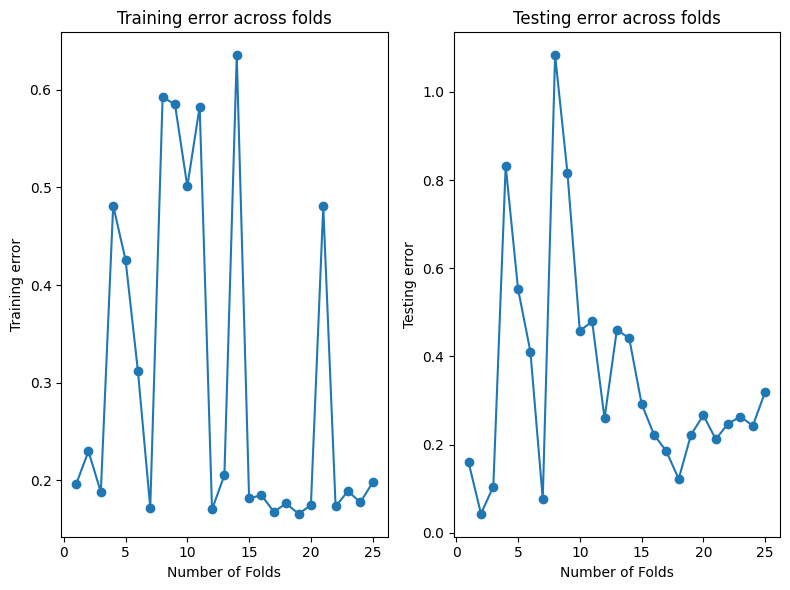

In [23]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(list_training_error),'o-')
plt.xlabel('Number of Folds')
plt.ylabel('Training error')
plt.title('Training error across folds')

plt.subplot(1,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(list_testing_error),'o-')
plt.xlabel('Number of Folds')
plt.ylabel('Testing error')
plt.title('Testing error across folds')

plt.tight_layout()

plt.show()

In [19]:
kf.get_n_splits()

25

In [ ]:
range(1,kf.get_n_splits()+1)